# Foreground Extraction / Background subtraction
---

### Introduction
Background subtraction (BS) is a common and widely used technique for generating a foreground mask (namely, a binary image containing the pixels belonging to moving objects in the scene) by using static cameras.

As the name suggests, BS calculates the foreground mask performing a subtraction between the current frame and a background model, containing the static part of the scene or, more in general, everything that can be considered as background given the characteristics of the observed scene.

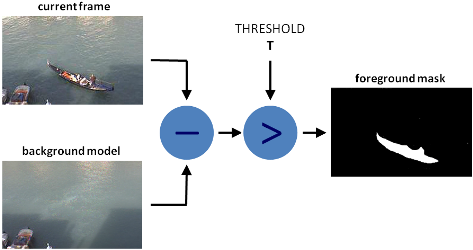

Background modeling consists of two main steps:

1.Background Initialization
2.Background Update.
In the first step, an initial model of the background is computed, while in the second step that model is updated in order to adapt to possible changes in the scene.

We will discuss the following algorithms which are available in the opencv library. Kindly refer to the respective papers for the details of the algorithm which will be highly useful for parameter tuning.

#### 1 . BackgroundSubtractorMOG
An improved adaptive background mixture model for real-time tracking with shadow detection in 2001

#### 2. BackgroundSubtractorMOG2
Improved adaptive Gausian mixture model for background subtraction in 2004 and Efficient Adaptive
 Density Estimation per Image Pixel for the Task of Background Subtraction in 2006 

#### 3. BackgroundSubtractorGMG
Visual Tracking of Human Visitors under Variable-Lighting Conditions for a Responsive Audio Art Installation in 2012


In [2]:
# As usual, a bit of setup

import numpy as np
import cv2

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## BackgroundSubtractorMOG
---

In [3]:
cap = cv2.VideoCapture('vtest.avi') #you can find the video in your opencv folder - opencv/samples/data or 
# at https://github.com/opencv/opencv/tree/master/samples/data. Copy the video to your current directory
     
#For opencv 3.x ,Remember you must have opencv contrib installed.
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()

#For opencv 2.x
#fgbg = cv2.createBackgroundSubtractorMOG()
     
while(1):
  ret, frame = cap.read()   #reading the video frame by frame
  if ret == 0:
    break;
  fgmask = fgbg.apply(frame)  #obtaining the foreground mask
  cv2.imshow('frame',fgmask)
  k = cv2.waitKey(1) & 0xff
  if k == 27:
     break 
cap.release()
cv2.destroyAllWindows()

############################################################################
#                             END OF CODE                             #
############################################################################
    

### Results:

Original Frame

Below image shows the 200th frame of a video

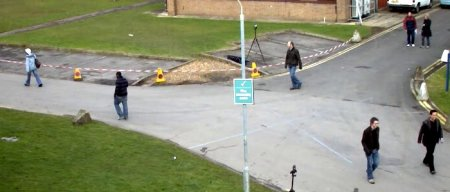

Result of BackgroundSubtractorMOG
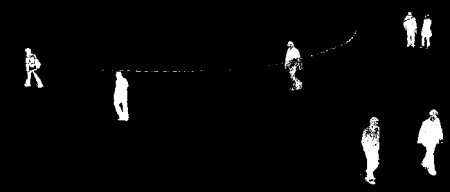


## BackgroundSubtractorMOG2
---

In [3]:
cap = cv2.VideoCapture('vtest.avi') #you can find the video in your opencv folder - opencv/samples/data or 
# at https://github.com/opencv/opencv/tree/master/samples/data.Copy the video to your current directory
     
#For opencv 3.x ,Remember you must have opencv contrib installed.
fgbg = cv2.createBackgroundSubtractorMOG2()

#For opencv 2.x
#fgbg = cv2.createBackgroundSubtractorMOG2()
     
while(1):
  ret, frame = cap.read()   #reading the video frame by frame
  if ret == 0:
    break
  fgmask = fgbg.apply(frame)  #obtaining the foreground mask
  cv2.imshow('frame',fgmask)
  k = cv2.waitKey(1) & 0xff
  if k == 27:
     break 
cap.release()
cv2.destroyAllWindows()

############################################################################
#                             END OF CODE                             #
############################################################################
    

### Results:
Result of BackgroundSubtractorMOG

Gray color region shows shadow region

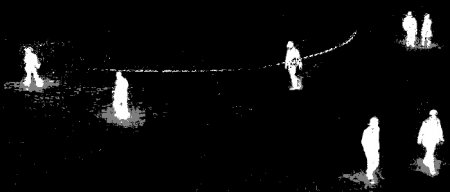

## BackgroundSubtractorGMG
---

In [ ]:
cap = cv2.VideoCapture('vtest.avi') #you can find the video in your opencv folder - opencv/samples/data or 
# at https://github.com/opencv/opencv/tree/master/samples/data. Copy the video to your current directory
     
#For opencv 3.x ,Remember you must have opencv contrib installed.
fgbg = cv2.bgsegm.createBackgroundSubtractorGMG()

#For opencv 2.x
#fgbg = cv2.createBackgroundSubtractorMOG()
     
while(1):
  ret, frame = cap.read()   #reading the video frame by frame
  if ret == 0:
    break
  fgmask = fgbg.apply(frame)  #obtaining the foreground mask
  fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel) #Noise is removed with morphological opening.
  cv2.imshow('frame',fgmask)
  k = cv2.waitKey(30) & 0xff
  if k == 27:
     break 
cap.release()
cv2.destroyAllWindows()

############################################################################
#                             END OF CODE                             #
############################################################################
    

### Results:

Result of BackgroundSubtractorGMG

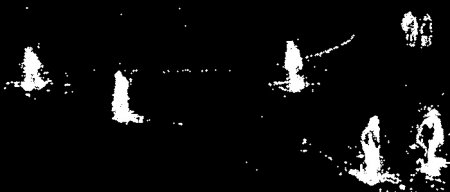


### Exercise:
#### Pedestrian Detection :
Create bounding boxes around the moving objects in the video. Write your code in the specified box below. You can have a look at the algorithm in the box.The output at the 200th frame is shown below

<img src="output.png">

In [ ]:
cap = cv2.VideoCapture('vtest.avi') 

#For opencv 3.x ,Remember you must have opencv contrib installed.
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()

#For opencv 2.x
#fgbg = cv2.createBackgroundSubtractorMOG()
     
while(1):
  ret, frame = cap.read()   #reading the video frame by frame
  if(ret):
   fgmask = fgbg.apply(frame)  #obtaining the foreground mask

    ############################################################################
    # Algorithm :Perform Pre-processing on the obtained mask o remove noise          #
    # Hint:Median Blur,dilation,erosion,etc..                                  #
    # Obtain the contours                                                      #
    # Set a threshold on the bounding box area to avoid unwanted boxes.        #
    # use the cv2.boundingRect function for the bounding rectangle             #
    #                             END OF YOUR CODE                             #
    ############################################################################



   cv2.imshow('frame',fgmask)
   k = cv2.waitKey(30) & 0xff
   if k == 27:
     break 
cap.release()
cv2.destroyAllWindows()

### Further Reading:
The BGSlibrary is a free and open source(for academic purposes) library consisting of 43 background subtraction algorithms.

Check out the list of availabe algorithms here: https://github.com/andrewssobral/bgslibrary/wiki/List-of-available-algorithms

The installation instructions for Ubuntu or OSX can be found here:https://github.com/andrewssobral/bgslibrary/wiki/Installation-instructions-Ubuntu-or-OSX

Students are adviced to try out the following algorithms which give very good results:
PixelBasedAdaptiveSegmenter, LBAdaptiveSOM, DPWrenGA, MixtureOfGaussianV2 and MultiLayer

### References:
1.OpenCV Python Documentation - http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html

2.BGSlibrary - https://github.com/andrewssobral/bgslibrary